In [2]:
using Plots

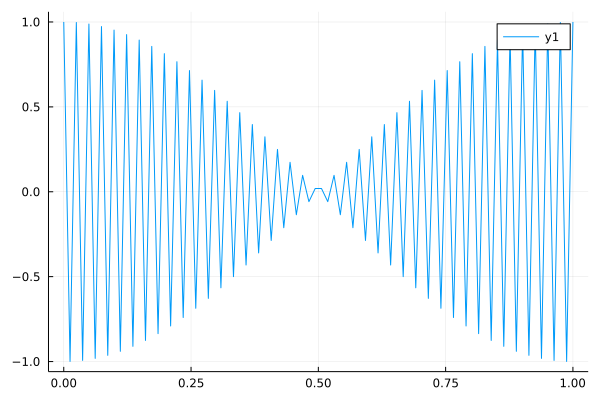

In [3]:
N = 81
n=40
dx = 1/N
k = n
x_val = 0:dx:1
#y_val = sin.(x_val)
e_val = exp.(im*2π* k* x_val)
e_val_fl = reinterpret(Float64, e_val)
y_val = @view e_val_fl[1:2:end-1]
plot(x_val,y_val)

In [24]:
n_val = -(N-1)/2:(N-1)/2
l_val_2 = sin.(2*π*n_val/N)*N
l_val_4 = (8sin.(2*π*n_val/N) - sin.(4*π*n_val/N))*N/6
l_val_6 = (45sin.(2*π*n_val/N) - 9sin.(4*π*n_val/N) + sin.(6*π*n_val/N))*N/30
l_val_8 = (224sin.(2*π*n_val/N) - 56sin.(4*π*n_val/N) + 1120/105*sin.(6*π*n_val/N) - sin.(8*π*n_val/N))*N/140

plot(n_val,[l_val_2,l_val_4, l_val_6, l_val_8],label=["D_2" "D_4" "D_6" "D_8"])
savefig("dispersions.png")

In [23]:
val_KO_2 = abs.(exp.(im*2*π*n_val/N).-1).^2*N/2
val_KO_4 = abs.(exp.(im*2*π*n_val/N).-1).^4*N/2^3
val_KO_6 = abs.(exp.(im*2*π*n_val/N).-1).^6*N/2^5
val_KO_8 = abs.(exp.(im*2*π*n_val/N).-1).^8*N/2^7
plot(n_val,[val_KO_2, val_KO_4, val_KO_6, val_KO_8],label=["KO_2" "KO_4" "KO_6" "KO_8"])
savefig("KO_eigenvals.png")

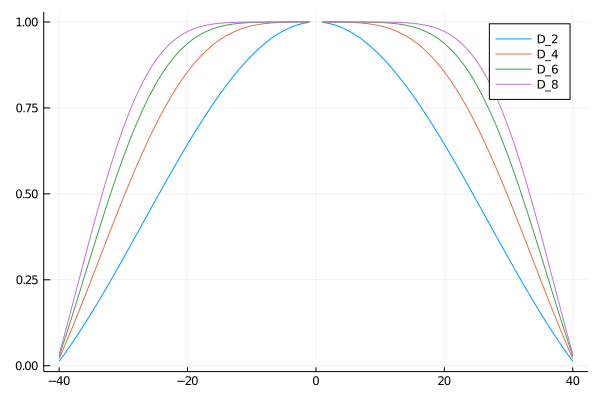

In [26]:
function v2(k,N)
    return sin.(2*π*k/N)*N/(k)/2/π
end
function v4(k,N)
    return (8sin.(2*π*k/N) - sin.(4*π*k/N))*N/6/(k)/2/π
end
function v6(k,N)
    return (45sin.(2*π*k/N) - 9sin.(4*π*k/N) + sin.(6*π*k/N))*N/30/(k)/2/π
end
function v8(k,N)
    return (224sin.(2*π*k/N) - 56sin.(4*π*k/N) + 1120/105*sin.(6*π*k/N) - sin.(8*π*k/N))*N/140/(k)/2/π
end

v_val_2 = v2.(n_val, N)
v_val_4 = v4.(n_val, N)
v_val_6 = v6.(n_val, N)
v_val_8 = v8.(n_val, N)

plot(n_val,[v_val_2,v_val_4, v_val_6, v_val_8],label=["D_2" "D_4" "D_6" "D_8"])
#savefig("face-velocity.png")

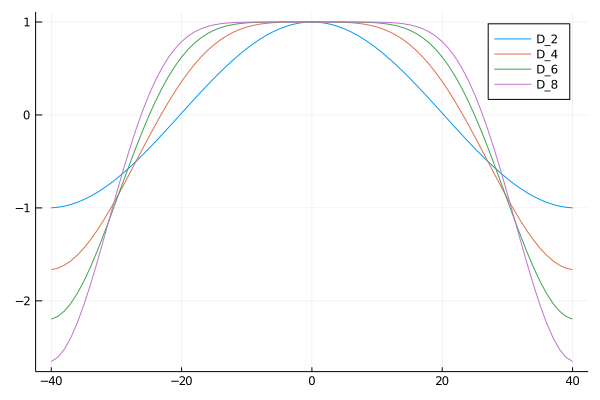

In [27]:
function gv2(k,N)
    return cos.(2*π*k/N)
end
function gv4(k,N)
    return (8cos.(2*π*k/N) - 2cos.(4*π*k/N))/6
end
function gv6(k,N)
    return (45cos.(2*π*k/N) - 18cos.(4*π*k/N) + 3cos.(6*π*k/N))/30
end
function gv8(k,N)
    return (224cos.(2*π*k/N) - 112cos.(4*π*k/N) + 3360/105*cos.(6*π*k/N) - 4cos.(8*π*k/N))/140
end
gv_val_2 = gv2.(n_val, N)
gv_val_4 = gv4.(n_val, N)
gv_val_6 = gv6.(n_val, N)
gv_val_8 = gv8.(n_val, N)
plot(n_val,[gv_val_2,gv_val_4,gv_val_6,gv_val_8],label=["D_2" "D_4" "D_6" "D_8"])
#savefig("group_velocity.png")